## Input ressults from Baseline Experiments

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

# Analyzing the Experiments

## Define Helper functions

In [2]:
def prepare_results_table(df_list, model_names):
    df_results = pd.concat([df.tail(1) for df in df_list], axis=0)
    df_results.rename(columns={'Unnamed: 0':'Neural Network Model'}, inplace=True)
    df_results.iloc[:,0] = model_names
    df_results = df_results.reset_index(drop=True)
    
    return df_results

def return_results_barplot(df_list):
    train_errors = [list(df['error(train)'])[-1] for df in df_list]
    valid_errors = [list(df['error(valid)'])[-1] for df in df_list]
    train_accuracy = [list(df['acc(train)'])[-1] for df in df_list]
    valid_accuracy = [list(df['acc(valid)'])[-1] for df in df_list]
    
    train_results = [train_errors, train_accuracy]
    valid_results = [valid_errors, valid_accuracy]
    
    return [train_results, valid_results]

## Plot initial model

In [3]:
init_results = pd.read_csv('Results/Baseline_experiments/init_train_valid.csv', index_col=None)

In [801]:
def plot_acc_error_evolution(dataset_list):
    fig, axes = plt.subplots(2, 1, figsize = (10,8), sharex=True)

    # Get epoch number for x axis
    epoch_n = range(1, len(dataset_list[0])+1)

    titles = ['Evolution of Error and Accuracy', None]
    acc_error = ['error', 'acc']
    ylabels = ['Error', 'Accuracy']

    for i in range(len(axes)):
        # Plot lines
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[0], marker='.', markerfacecolor='skyblue', markersize=8, color='skyblue', linewidth=4, label = 'Initial Model (train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[0], marker='', color='dodgerblue', linewidth=4, label = 'Initial Model (valid)')
        axes[i].tick_params(axis='both', which='major', labelsize=16)
        axes[i].set_ylabel(ylabels[i], fontsize=24)
        axes[i].set_title(titles[i], fontweight="bold", fontsize=26)
    axes[0].legend(loc='best', prop={'size': 22})
    axes[1].set_xlabel('Epoch', fontsize=24)
    plt.tight_layout()
    plt.show()

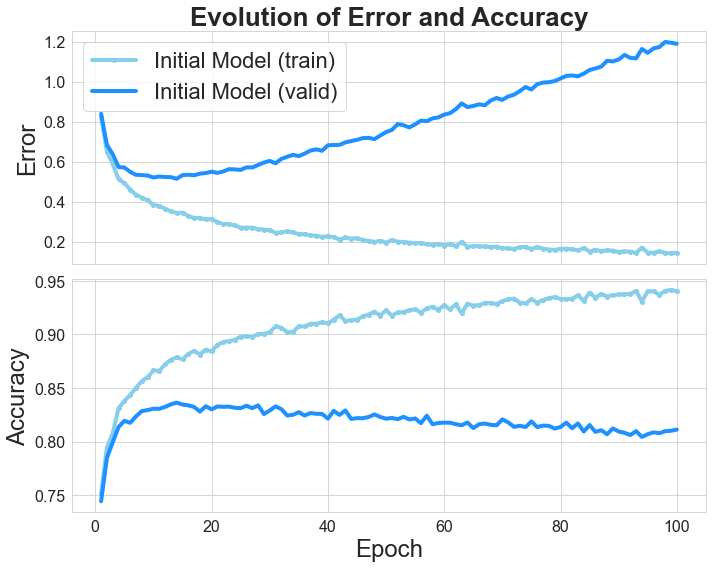

In [802]:
plot_acc_error_evolution([init_results])

# Analysis and Plotting of Baseline Experiments

## Analysis of results from varying the width of the network compared to initial network

In [6]:
# Import DataFrames
hu_32_results = pd.read_csv('Results/Baseline_experiments/hu_32_train_valid.csv', index_col=None)
hu_64_results = pd.read_csv('Results/Baseline_experiments/hu_64_train_valid.csv', index_col=None)
hu_128_results = pd.read_csv('Results/Baseline_experiments/hu_128_train_valid.csv', index_col=None)
hu_df_list = [hu_32_results, hu_64_results, hu_128_results]

# Get final results
width_results = prepare_results_table(hu_df_list, 
                                     model_names = ['32 Hidden Units', '64 Hidden Units', '128 Hidden Units'])
width_results

,Neural Network Model,error(train),error(valid),acc(train),acc(valid),runtime
0,32 Hidden Units,0.481339,0.663353,0.83941,0.798291,286.767047
1,64 Hidden Units,0.252922,0.772615,0.90462,0.812342,357.017928
2,128 Hidden Units,0.093742,1.589502,0.96235,0.815127,495.028269


## Visualising the results

### Barplots of final accuracy

In [704]:
def barplot_plotter_width(train_results, valid_results, titles):
    N = len(train_results[0])

    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, axes = plt.subplots(1, 2, figsize = (15,7))

    ylabels = ['Error', 'Accuracy']
    
    for i in range(len(axes)):
        rects1 = axes[i].bar(ind, train_results[i], width, color='skyblue')
        rects2 = axes[i].bar(ind + width, valid_results[i], width, color='dodgerblue')

        # add some text for labels, title and axes ticks
        axes[i].set_ylabel(ylabels[i], fontsize=26)
        axes[i].set_xlabel('Number of Hidden Units', fontsize=26)
        axes[i].set_title(titles[i], fontweight="bold", fontsize=28)
        axes[i].set_xticks(ind + width / 2)
        axes[i].tick_params(axis='both', which='major', labelsize=26)
        axes[i].set_xticklabels(('32', '64', '128'))
    axes[0].legend((rects1[0], rects2[0]), ('Train', 'Validation'), loc='upper left', prop={'size': 24})
    plt.show()

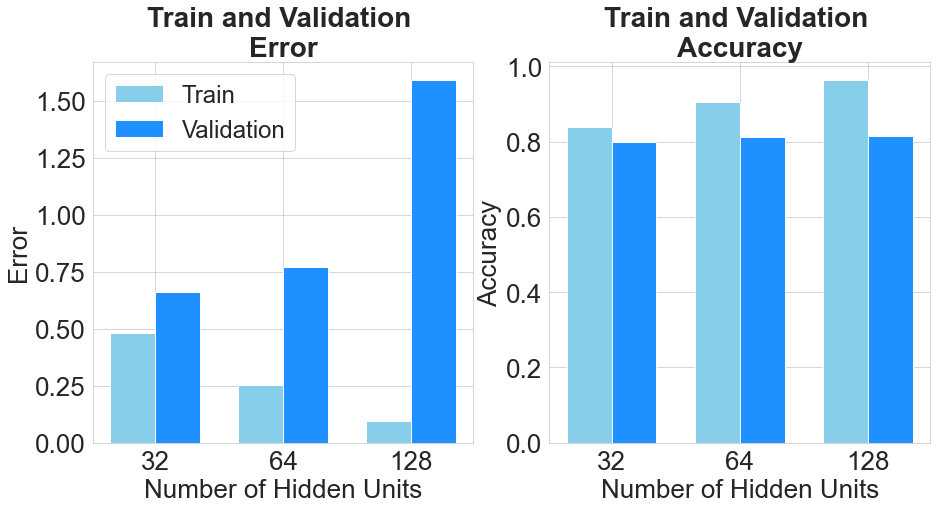

In [705]:
results = return_results_barplot(df_list = hu_df_list)

barplot_plotter_width(results[0], results[1], 
                      titles=['Train and Validation \nError', 
                       'Train and Validation \nAccuracy'])

### Lineplots of evolution of training and validation error and accuracy

In [141]:
def plot_acc_error_evolution(dataset_list):
    fig, axes = plt.subplots(1, 2, figsize = (15,7))

    # Get epoch number for x axis
    epoch_n = range(1, len(dataset_list[0])+1)

    titles = ['Evolution of Error for different Hidden Units', 'Evolution of Accuracy for different Hidden Units']
    acc_error = ['error', 'acc']
    ylabels = ['Error', 'Accuracy']

    for i in range(len(axes)):
        # Plot lines
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[0], marker='.', markerfacecolor='lightblue', markersize=8, color='skyblue', linewidth=3, label = '32 Hidden Units (train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[0], marker='', color='dodgerblue', linewidth=3, label = '32 Hidden Units(valid)')
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[1], marker='.', markerfacecolor='orange', markersize=8, color='peachpuff', linewidth=3, label = '64 Hidden Units (train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[1], marker='', color='orange', linewidth=3, label = '64 Hidden Units (valid)')
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[2], marker='.', markerfacecolor='green', markersize=8, color='darkseagreen', linewidth=3, label ='128 Hidden Units(train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[2], marker='', color='green', linewidth=3, label = '128 Hiden Units (valid)')
        axes[i].legend(loc='best', prop={'size': 13})
        axes[i].tick_params(axis='both', which='major', labelsize=12)
        axes[i].set_ylabel(ylabels[i], fontsize=14)
        axes[i].set_xlabel('Epoch', fontsize=14)
        axes[i].set_title(titles[i], fontweight="bold", fontsize=14)

    plt.show()

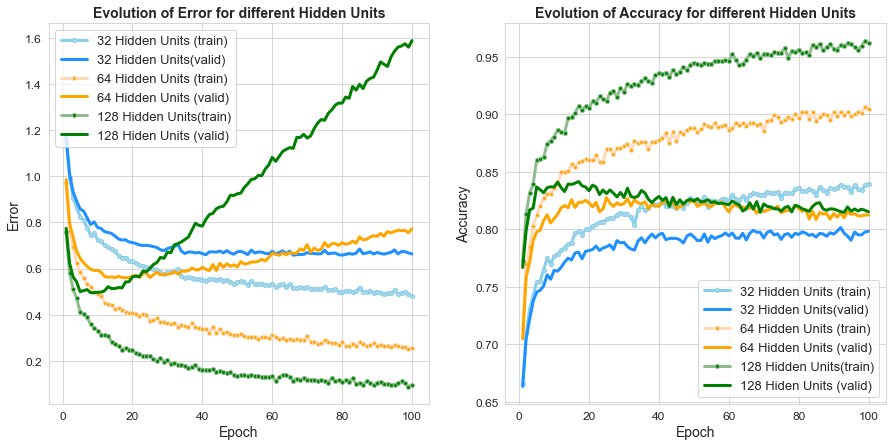

In [142]:
plot_acc_error_evolution([hu_32_results, hu_64_results, hu_128_results])

## Analysis of results from varying the width of the network compared to initial network

In [11]:
hl_1_results = pd.read_csv('Results/Baseline_experiments/hl_1_train_valid.csv', index_col=None)
hl_2_results= pd.read_csv('Results/Baseline_experiments/hl_2_train_valid.csv', index_col=None)
hl_3_results = pd.read_csv('Results/Baseline_experiments/hl_3_train_valid.csv', index_col=None)
hl_df_list = [hl_1_results, hl_2_results, hl_3_results]

In [12]:
depth_results = prepare_results_table(df_list=hl_df_list, model_names=['1 Hidden Layer', '2 Hidden Layers',
                                                                      '3 Hidden Layers'])
depth_results

,Neural Network Model,error(train),error(valid),acc(train),acc(valid),runtime
0,1 Hidden Layer,0.096132,1.537700,0.96183,0.817405,491.026577
1,2 Hidden Layers,0.125876,1.698157,0.95426,0.818481,612.023386
2,3 Hidden Layers,0.121309,1.397960,0.95440,0.823797,705.784438


## Visualising the results

In [706]:
def barplot_plotter_depth(train_results, valid_results, titles):
    N = len(train_results[0])

    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, axes = plt.subplots(1, 2, figsize = (15,7))

    ylabels = ['Error', 'Accuracy']
    
    for i in range(len(axes)):
        rects1 = axes[i].bar(ind, train_results[i], width, color='skyblue')
        rects2 = axes[i].bar(ind + width, valid_results[i], width, color='dodgerblue')

        # add some text for labels, title and axes ticks
        axes[i].set_ylabel(ylabels[i], fontsize=26)
        axes[i].set_xlabel('Number of Hidden Layers', fontsize=26)
        axes[i].set_title(titles[i], fontweight="bold", fontsize=28)
        axes[i].set_xticks(ind + width / 2)
        axes[i].tick_params(axis='both', which='major', labelsize=26)
        axes[i].set_xticklabels(('1', '2', '3'))
    
    axes[0].legend((rects1[0], rects2[0]), ('Train', 'Validation'), loc='upper left', prop={'size': 24})
    plt.show()

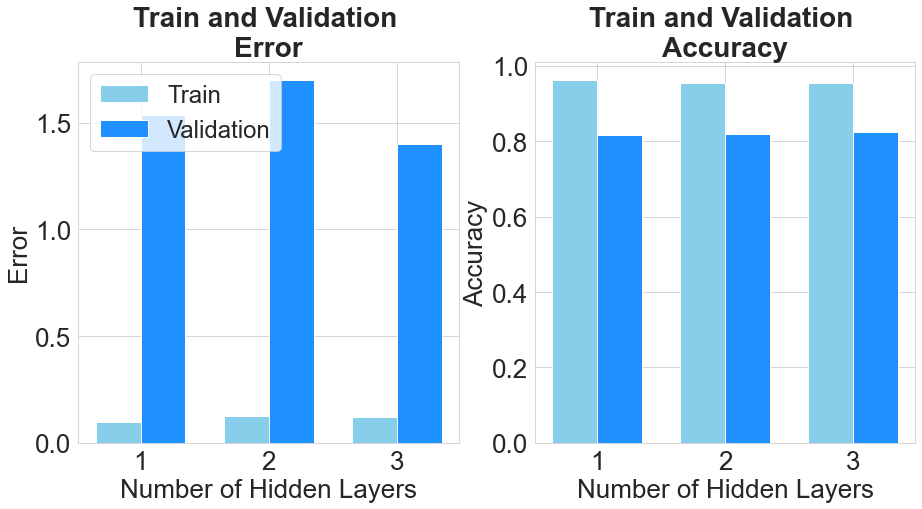

In [707]:
results = return_results_barplot(df_list = hl_df_list)
barplot_plotter_depth(results[0], results[1], 
                     ['Train and Validation \nError',
                      'Train and Validation \nAccuracy'])

In [143]:
def plot_acc_error_evolution(dataset_list):
    fig, axes = plt.subplots(1, 2, figsize = (15,7))

    # Get epoch number for x axis
    epoch_n = range(1, len(dataset_list[0])+1)

    titles = ['Evolution of Error for different Hidden Layers', 'Evolution of Accuracy for different Hidden Layers']
    acc_error = ['error', 'acc']
    ylabels = ['Error', 'Accuracy']

    for i in range(len(axes)):
        # Plot lines
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[0], marker='.', markerfacecolor='lightblue', markersize=8, color='skyblue', linewidth=3, label = '1 Hidden Layer( train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[0], marker='', color='dodgerblue', linewidth=3, label = '1 Hidden Layer (validation)')
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[1], marker='.', markerfacecolor='orange', markersize=8, color='peachpuff', linewidth=3, label = '2 Hidden Layers (train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[1], marker='', color='orange', linewidth=3, label = '2 Hidden Layers (validation)')
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[2], marker='.', markerfacecolor='green', markersize=8, color='darkseagreen', linewidth=3, label ='3 Hidden Layers (train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[2], marker='', color='green', linewidth=3, label = '3 Hidden Layers(validation)')
        axes[i].legend(loc='best', prop={'size': 13})
        axes[i].tick_params(axis='both', which='major', labelsize=12)
        axes[i].set_ylabel(ylabels[i], fontsize=14)
        axes[i].set_xlabel('Epoch', fontsize=14)
        axes[i].set_title(titles[i], fontweight="bold", fontsize=14)

    plt.show()

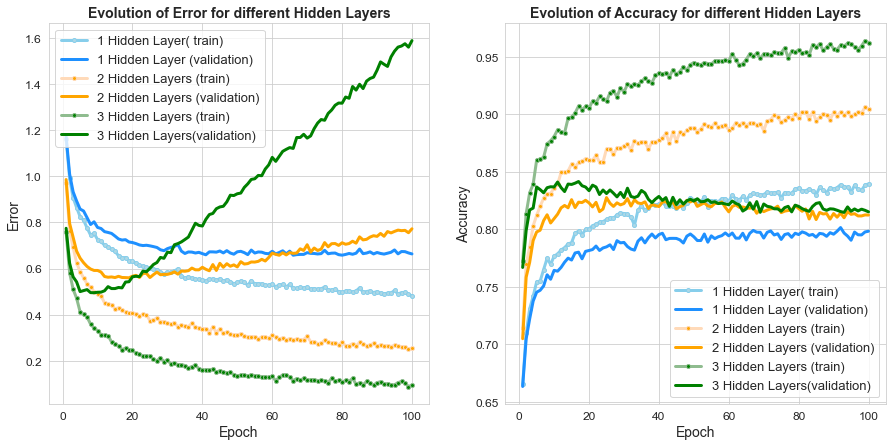

In [144]:
plot_acc_error_evolution([hu_32_results, hu_64_results, hu_128_results])

# Analysis and Plotting of Dropout Experiments compared to Baseline

### Import results from Baseline Experiments

In [17]:
baseline_df = pd.read_csv('Results/EMNIST_experiments/bl_train_valid.csv', index_col=None)

## Analysis of results from varying the width of the network compared to initial network

In [18]:
d_02_results = pd.read_csv('Results/EMNIST_experiments/Dropout/d_02_train_valid.csv', index_col=None)
d_05_results = pd.read_csv('Results/EMNIST_experiments/Dropout/d_05_train_valid.csv', index_col=None)
d_decf_results = pd.read_csv('Results/EMNIST_experiments/Dropout/d_decf_train_valid.csv', index_col=None)

d_df_list = [d_02_results, d_05_results, d_decf_results, baseline_df]
dropout_results = prepare_results_table(df_list = d_df_list, model_names = ['Inclusion Probability = 0.2', 
                                                                           'Inclusion Probability = 0.5', 
                                                                            'Decreasing Inclusion Probability', 
                                                                           'Baseline Model'])
dropout_results

,Neural Network Model,error(train),error(valid),acc(train),acc(valid),runtime
0,Inclusion Probability = 0.2,2.446614,2.475923,0.27379,0.266456,1178.973976
1,Inclusion Probability = 0.5,0.979093,1.046985,0.69619,0.678734,1045.238297
2,Decreasing Inclusion Probability,0.920588,1.042988,0.71094,0.688418,1108.892405
3,Baseline Model,0.127733,1.452153,0.95193,0.824304,673.939135


## Visualising the results

### Barplots of final accuracy

In [708]:
def barplot_plotter_width(train_results, valid_results, titles):
    N = len(train_results[0])
    
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, axes = plt.subplots(1, 2, figsize = (15,7))

    ylabels = ['Error', 'Accuracy']
    
    for i in range(len(axes)):
        rects1 = axes[i].bar(ind, train_results[i], width, color='skyblue')
        rects2 = axes[i].bar(ind + width, valid_results[i], width, color='dodgerblue')
        
        rects1[-1].set_color('darkgrey')
        rects2[-1].set_color('lightgrey')

        # add some text for labels, title and axes ticks
        axes[i].set_ylabel(ylabels[i], fontsize=26)
        axes[i].set_title(titles[i], fontweight="bold", fontsize=28)
        axes[i].set_xticks(ind + width / 2)
        axes[i].set_xticklabels(('Model 1', 'Model 2', 'Model 3', 'Baseline\nModel'), rotation= 45)
        axes[i].tick_params(axis='both', which='major', labelsize=26)
    axes[0].legend((rects1[0], rects2[0]), ('Train', 'Validation'), loc='best', prop={'size': 24})
        

    plt.show()

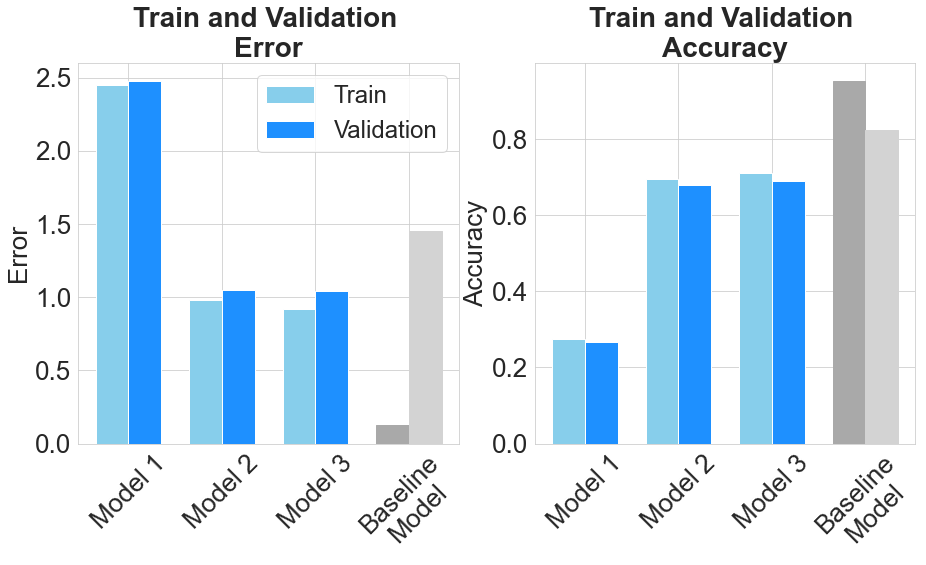

In [709]:
results = return_results_barplot(df_list = d_df_list)

barplot_plotter_width(results[0], results[1], 
                      ['Train and Validation \nError', 
                       'Train and Validation \nAccuracy'])

### Lineplots of evolution of training and validation error and accuracy

In [784]:
def plot_acc_error_evolution(dataset_list):
    fig, axes = plt.subplots(1, 2, figsize = (15,7))

    # Get epoch number for x axis
    epoch_n = range(1, len(dataset_list[0])+1)

    titles = ['Evolution of Error and Accuracy with Dropout', 
              None]
    acc_error = ['error', 'acc']
    ylabels = ['Error', 'Accuracy']

    for i in range(len(axes)):
        # Plot lines
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[0], marker='.', markerfacecolor='lightblue', markersize=8, color='skyblue', linewidth=4, label = '0.2(train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[0], marker='', color='dodgerblue', linewidth=4, label = '0.2(valid)')
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[1], marker='.', markerfacecolor='orange', markersize=8, color='peachpuff', linewidth=4, label = '0.5(train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[1], marker='', color='orange', linewidth=4, label = '0.5(valid)')
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[2], marker='.', markerfacecolor='green', markersize=8, color='darkseagreen', linewidth=4, label ='DF(train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[2], marker='', color='green', linewidth=4, label = 'DF(valid)')
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[3], marker='.', markerfacecolor='lightgrey', markersize=8, color='lightgrey', linewidth=4, label ='BM(train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[3], marker='', color='darkgrey', linewidth=4,label = 'BM(valid)')
        axes[i].tick_params(axis='both', which='major', labelsize=20)
        axes[i].set_ylabel(ylabels[i], fontsize=20)
        axes[i].set_title(titles[i], fontweight="bold", fontsize=20)
    
    axes[0].legend(prop={'size': 20}, loc='upper left',)
    axes[1].set_xlabel('Epoch', fontsize=20)
    plt.tight_layout()
    plt.show()

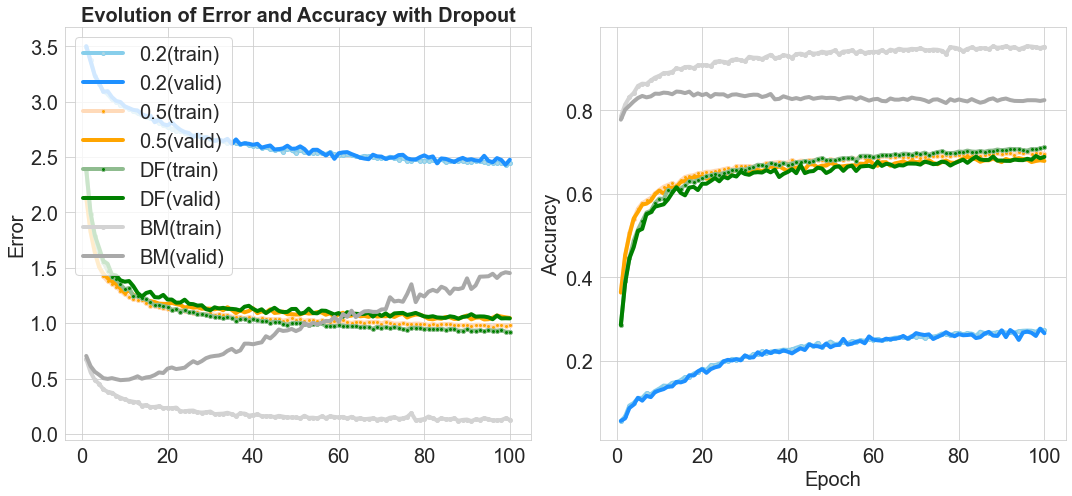

In [785]:
plot_acc_error_evolution(d_df_list)

# Analysis and Plotting of L1 Regularisation Experiments compared to Baseline

## Analysis of results from varying the width of the network compared to initial network

In [643]:
L1_1e_4_results = pd.read_csv('Results/EMNIST_experiments/L1_reg/L1_1e_4_train_valid.csv', index_col=None)
L1_1e_2_results = pd.read_csv('Results/EMNIST_experiments/L1_reg/L1_1e_2_train_valid.csv', index_col=None)
L1__incf_results = pd.read_csv('Results/EMNIST_experiments/L1_reg/L1_incf_train_valid.csv', index_col=None)

L1_df_list = [L1_1e_4_results, L1_1e_2_results, L1__incf_results, baseline_df]
L1_results = prepare_results_table(df_list = L1_df_list, model_names = ['Weight Penalty = 1e-4', 
                                                                           'Weight Penalty = 1e-2', 
                                                                            'Increasing Weight Penalty', 
                                                                           'Baseline Model'])
L1_results

,Neural Network Model,error(train),error(valid),acc(train),acc(valid),runtime
0,Weight Penalty = 1e-4,0.325711,0.433294,0.87976,0.852089,801.795396
1,Weight Penalty = 1e-2,3.850118,3.850548,0.02175,0.019810,771.460007
2,Increasing Weight Penalty,3.850121,3.850513,0.02174,0.020127,775.329974
3,Baseline Model,0.127733,1.452153,0.95193,0.824304,673.939135


## Visualising the results

### Barplots of final accuracy

In [644]:
def barplot_plotter_width(train_results, valid_results, titles):
    N = len(train_results[0])
    
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, axes = plt.subplots(1, 2, figsize = (15,7))

    ylabels = ['Error', 'Accuracy']
    
    for i in range(len(axes)):
        rects1 = axes[i].bar(ind, train_results[i], width, color='green')
        rects2 = axes[i].bar(ind + width, valid_results[i], width, color='darkseagreen')
        
        rects1[-1].set_color('darkgrey')
        rects2[-1].set_color('lightgrey')

        # add some text for labels, title and axes ticks
        axes[i].set_ylabel(ylabels[i], fontsize=14)
        axes[i].set_xlabel('Weight Penalty', fontsize=14)
        axes[i].set_title(titles[i], fontweight="bold", fontsize=15)
        axes[i].set_xticks(ind + width / 2)
        axes[i].set_xticklabels(('1e-4', '1e-2', 'Increasing Weight \nPenalty', 'Baseline Model'))
        axes[i].tick_params(axis='both', which='major', labelsize=12)
        axes[i].legend((rects1[0], rects2[0]), ('Train', 'Validation'), loc='best', prop={'size': 13})
        
    plt.show()

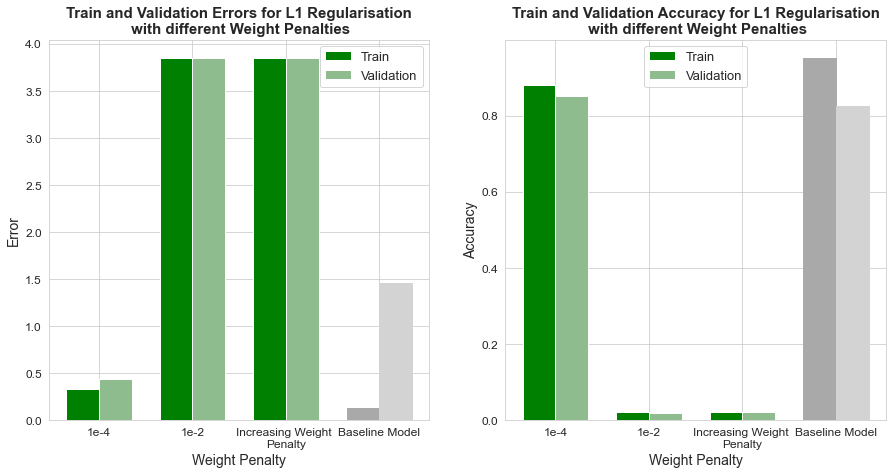

In [645]:
results = return_results_barplot(df_list = L1_df_list)

barplot_plotter_width(results[0], results[1], 
                      ['Train and Validation Errors for L1 Regularisation\n with different Weight Penalties', 
                       'Train and Validation Accuracy for L1 Regularisation\n with different Weight Penalties'])

### Lineplots of evolution of training and validation error and accuracy

In [789]:
def plot_acc_error_evolution(dataset_list):
    fig, axes = plt.subplots(1, 2, figsize = (15,7))

    # Get epoch number for x axis
    epoch_n = range(1, len(dataset_list[0])+1)

    titles = ['Evolution of Error for L1 Regularisation\n with different Weight Penalties', 
              'Evolution of Accuracy for L1 Regularisation\n with different Weight Penalties']
    acc_error = ['error', 'acc']
    ylabels = ['Error', 'Accuracy']

    for i in range(len(axes)):
        # Plot lines
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[0], marker='.', markerfacecolor='lightblue', markersize=8, color='skyblue', linewidth=3, label = '1e-4(train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[0], marker='', color='dodgerblue', linewidth=3, label = '1e-4(valid)')
        #axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[1], marker='.', markerfacecolor='orange', markersize=8, color='peachpuff', linewidth=3, label = '1e-2(train)')
        #axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[1], marker='', color='orange', linewidth=3, label = '1e-2(valid)')
        #axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[2], marker='.', markerfacecolor='green', markersize=8, color='darkseagreen', linewidth=3, label ='IF(train)')
        #axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[2], marker='', color='green', linewidth=3, label = 'IF(valid)')
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[3], marker='.', markerfacecolor='lightgrey', markersize=8, color='lightgrey', linewidth=3, label ='BM(train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[3], marker='', color='darkgrey', linewidth=2, label = 'BM(valid)')
        axes[i].legend(loc='best', prop={'size': 13})
        axes[i].tick_params(axis='both', which='major', labelsize=12)
        axes[i].set_ylabel(ylabels[i], fontsize=14)
        axes[i].set_xlabel('Epoch', fontsize=14)
        axes[i].set_title(titles[i], fontweight="bold", fontsize=14)

    plt.show()

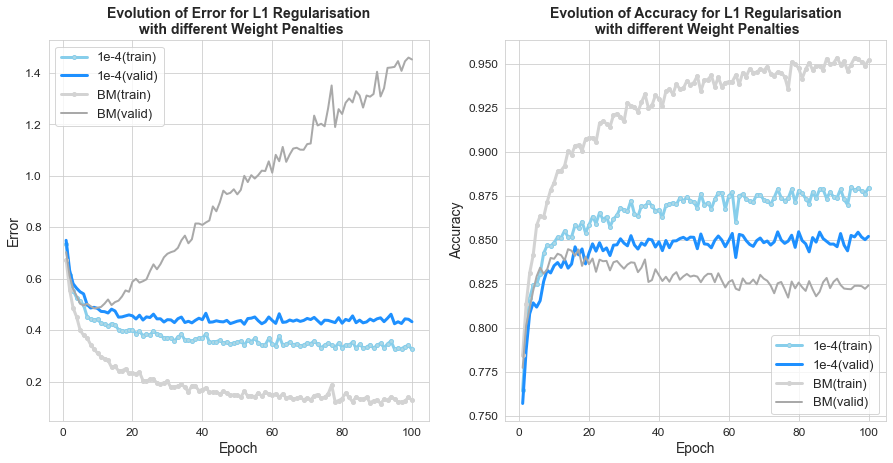

In [790]:
plot_acc_error_evolution(L1_df_list)

# Analysis and Plotting of L1 and L2 Regularisation Experiments compared to Baseline

## Analysis of results from varying the width of the network compared to initial network

In [717]:
L1_1e_4_results = pd.read_csv('Results/EMNIST_experiments/L1_reg/L1_1e_4_train_valid.csv', index_col=None)
L1_1e_2_results = pd.read_csv('Results/EMNIST_experiments/L1_reg/L1_1e_2_train_valid.csv', index_col=None)
L1_incf_results = pd.read_csv('Results/EMNIST_experiments/L1_reg/L1_incf_train_valid.csv', index_col=None)
L2_1e_4_results = pd.read_csv('Results/EMNIST_experiments/L2_reg/L2_1e_4_train_valid.csv', index_col=None)
L2_1e_2_results = pd.read_csv('Results/EMNIST_experiments/L2_reg/L2_1e_2_train_valid.csv', index_col=None)
L2_incf_results = pd.read_csv('Results/EMNIST_experiments/L2_reg/L2_incf_train_valid.csv', index_col=None)

L12_df_list = [L1_1e_4_results, L1_1e_2_results, L1_incf_results, 
              L2_1e_4_results, L2_1e_2_results, L2_incf_results, baseline_df]
L12_results = prepare_results_table(df_list = L12_df_list, model_names = ['L1 WP = 1e-4','L1 WP = 1e-2', 
                                                                        'L1 Increasing WP','L2 WP = 1e-4','L2 WP = 1e-2', 
                                                                        'L2 Increasing WP', 'Baseline Model'])
L12_results

,Neural Network Model,error(train),error(valid),acc(train),acc(valid),runtime
0,L1 WP = 1e-4,0.325711,0.433294,0.87976,0.852089,801.795396
1,L1 WP = 1e-2,3.850118,3.850548,0.02175,0.019810,771.460007
2,L1 Increasing WP,3.850121,3.850513,0.02174,0.020127,775.329974
3,L2 WP = 1e-4,0.151262,0.666996,0.93947,0.840380,1363.591212
4,L2 WP = 1e-2,0.774518,0.789742,0.76677,0.762722,758.966864
5,L2 Increasing WP,0.440904,0.519609,0.85299,0.827658,1131.049237
6,Baseline Model,0.127733,1.452153,0.95193,0.824304,673.939135


In [718]:
best_L12_results = [L1_1e_4_results, L2_incf_results, baseline_df]

## Visualising the results

### Barplots of final accuracy

In [719]:
def barplot_plotter_width(train_results, valid_results, titles):
    N = len(train_results[0])
    
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, axes = plt.subplots(1, 2, figsize = (15,7))

    ylabels = ['Error', 'Accuracy']
    
    for i in range(len(axes)):
        rects1 = axes[i].bar(ind, train_results[i], width, color='skyblue')
        rects2 = axes[i].bar(ind + width, valid_results[i], width, color='dodgerblue')
        
        rects1[-1].set_color('darkgrey')
        rects2[-1].set_color('lightgrey')

        # add some text for labels, title and axes ticks
        axes[i].set_ylabel(ylabels[i], fontsize=26)
        axes[i].set_title(titles[i], fontweight="bold", fontsize=28)
        axes[i].set_xticks(ind + width / 2)
        axes[i].set_xticklabels(('Model 1', 'Model 6', 'Baseline\nModel'), rotation= 45)
        axes[i].tick_params(axis='both', which='major', labelsize=26)
    axes[0].legend((rects1[0], rects2[0]), ('Train', 'Validation'), loc='best', prop={'size': 26})
        
    plt.show()

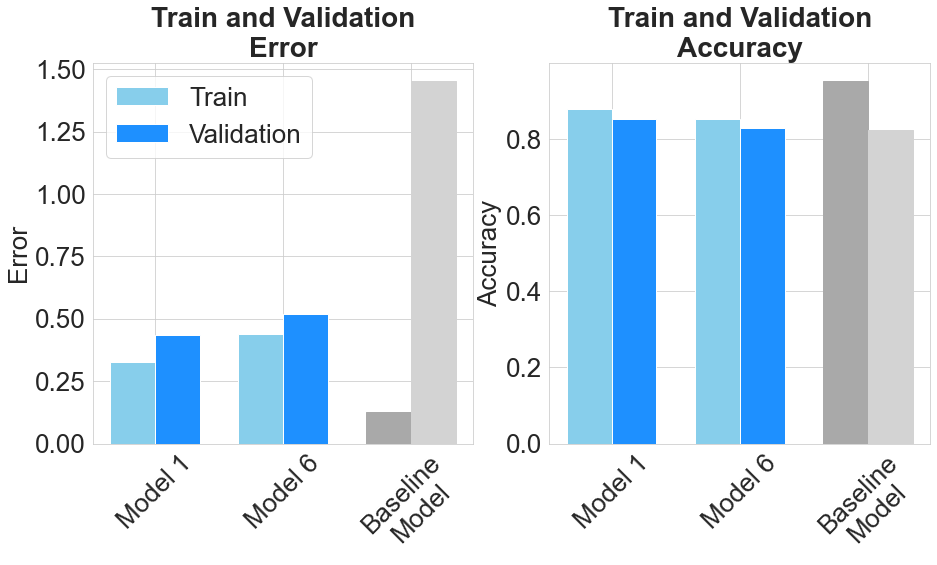

In [720]:
results = return_results_barplot(df_list = best_L12_results)

barplot_plotter_width(results[0], results[1], 
                      ['Train and Validation\nError', 
                       'Train and Validation\nAccuracy'])

### Lineplots of evolution of training and validation error and accuracy

In [721]:
def plot_acc_error_evolution(dataset_list):
    fig, axes = plt.subplots(2, 1, figsize = (13,13), sharex=True)

    # Get epoch number for x axis
    epoch_n = range(1, len(dataset_list[0])+1)

    titles = ['Evolution of Error for L2 Regularisation\n with different Weight Penalties', 
              'Evolution of Accuracy for L2 Regularisation\n with different Weight Penalties']
    acc_error = ['error', 'acc']
    ylabels = ['Error', 'Accuracy']

    for i in range(len(axes)):
        # Plot lines
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[0], marker='.', markerfacecolor='lightblue', markersize=10, color='skyblue', linewidth=3, label = 'Model 1 (train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[0], marker='', color='dodgerblue', linewidth=3, label = 'Model 1 (valid)')
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[1], marker='.', markerfacecolor='orange', markersize=10, color='peachpuff', linewidth=3, label = 'Model 6 (train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[1], marker='', color='orange', linewidth=3, label = 'Model 6 (valid)')
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[2], marker='.', markerfacecolor='grey', markersize=10, color='grey', linewidth=3, label ='Baseline Model (train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[2], marker='', color='darkgrey', linewidth=3, label = 'Baseline Model (valid)')
        axes[i].tick_params(axis='both', which='major', labelsize=24)
        axes[i].set_ylabel(ylabels[i], fontsize=24)
        
    axes[0].legend(loc='best', prop={'size': 20})
    axes[1].set_xlabel('Epoch', fontsize=26)
    axes[0].set_title('Evolution of Error and Accuracy\n for the best L1 and L2 models', fontweight="bold", fontsize=28)
    
    plt.tight_layout()
    plt.show()
    plt.show()

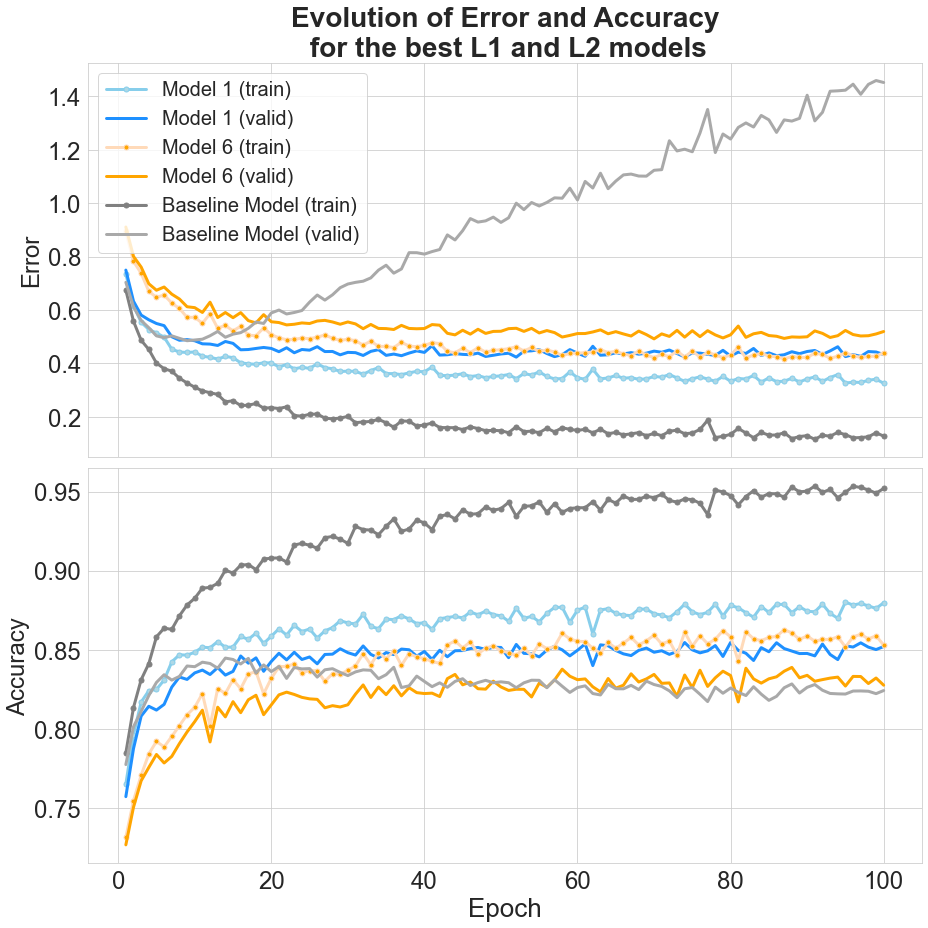

In [722]:
plot_acc_error_evolution(best_L12_results)

# Analysis and Plotting of L1 Regularisation + Dropout Experiments compared to Baseline

In [734]:
d05_L1_1e4_results = pd.read_csv('Results/EMNIST_experiments/Dropout_L1/d05_L1_1e4_train_valid.csv', index_col=None)
d08_L1_1e2_results = pd.read_csv('Results/EMNIST_experiments/Dropout_L1/d08_L1_1e2_train_valid.csv', index_col=None)
ddecf_L1incf_results = pd.read_csv('Results/EMNIST_experiments/Dropout_L1/ddecf_L1incf_train_valid.csv', index_col=None)

d_L1_df_list = [d08_L1_1e4_results, d05_L1_1e2_results, ddecf_L1incf_results, baseline_df]
d_L1_results = prepare_results_table(df_list = d_L1_df_list, model_names = ['Inclusion Probability =0.8, Weight Penalty = 1e-2', 'Inclusion Probability =0.5, Weight Penalty = 1e-4', 
                                                                            'Decreasing Incl. Prob, Increasing Weight Penalty', 
                                                                           'Baseline Model'])
d_L1_results

,Neural Network Model,error(train),error(valid),acc(train),acc(valid),runtime
0,"Inclusion Probability =0.8, Weight Penalty = 1e-2",0.619626,0.654141,0.79530,0.788101,1442.671811
1,"Inclusion Probability =0.5, Weight Penalty = 1e-4",3.850118,3.850460,0.02175,0.019810,1389.823015
2,"Decreasing Incl. Prob, Increasing Weight Penalty",0.990167,1.037622,0.69222,0.678228,1147.760271
3,Baseline Model,0.127733,1.452153,0.95193,0.824304,673.939135


In [738]:
d_L1_results.to_latex('d_l1_table_results.txt')

## Visualising the results

### Barplots of final accuracy

In [735]:
def barplot_plotter_width(train_results, valid_results, titles):
    N = len(train_results[0])
    
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, axes = plt.subplots(1, 2, figsize = (15,7), sharex=True)

    ylabels = ['Error', 'Accuracy']
    
    for i in range(len(axes)):
        rects1 = axes[i].bar(ind, train_results[i], width, color='skyblue')
        rects2 = axes[i].bar(ind + width, valid_results[i], width, color='dodgerblue')
        
        rects1[-1].set_color('darkgrey')
        rects2[-1].set_color('lightgrey')

        # add some text for labels, title and axes ticks
        axes[i].set_ylabel(ylabels[i], fontsize=26)
        axes[i].set_title(titles[i], fontweight="bold", fontsize=28)
        axes[i].set_xticks(ind + width / 2)
        axes[i].set_xticklabels(('Model 1', 'Model 2', 'Model 3', 'Baseline Model'), rotation=40)
        axes[i].tick_params(axis='both', which='major', labelsize=26)
    axes[0].legend((rects1[0], rects2[0]), ('Train', 'Validation'), loc='best', prop={'size': 24})
        
    plt.show()

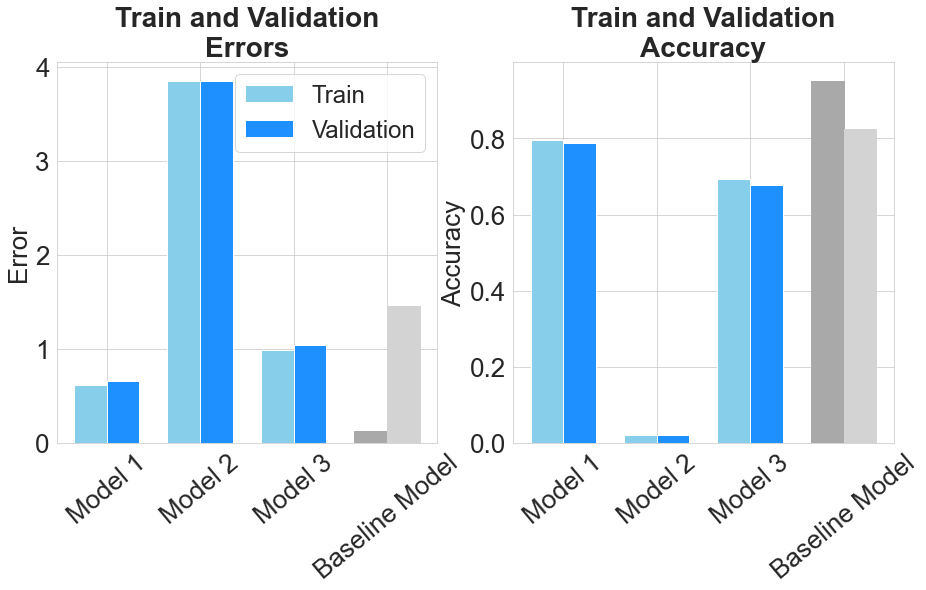

In [736]:
results = return_results_barplot(df_list = d_L1_df_list)

barplot_plotter_width(results[0], results[1], 
                      ['Train and Validation\nErrors', 
                       'Train and Validation\nAccuracy'])

### Lineplots of evolution of training and validation error and accuracy

In [715]:
def plot_acc_error_evolution(dataset_list):
    fig, axes = plt.subplots(1, 2, figsize = (20,7))

    # Get epoch number for x axis
    epoch_n = range(1, len(dataset_list[0])+1)

    titles = ['Evolution of Error for L2 Regularisation\n with Dropout', 
              'Evolution of Accuracy for L2 Regularisation\n with Dropout']
    acc_error = ['error', 'acc']
    ylabels = ['Error', 'Accuracy']

    for i in range(len(axes)):
        # Plot lines
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[0], marker='.', markerfacecolor='lightblue', markersize=10, color='skyblue', linewidth=3, label = '1e-3/0.2(train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[0], marker='', color='dodgerblue', linewidth=3, label = '1e-3/0.2(valid)')
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[1], marker='.', markerfacecolor='orange', markersize=10, color='peachpuff', linewidth=3, label = '1e-2/0.5(train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[1], marker='', color='orange', linewidth=3, label = '1e-2/0.5(valid)')
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[2], marker='.', markerfacecolor='green', markersize=10, color='darkseagreen', linewidth=3, label ='IF/DF(train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[2], marker='', color='green', linewidth=3, label = 'IF/DF(valid)')
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[3], marker='.', markerfacecolor='lightgrey', markersize=10, color='lightgrey', linewidth=3, label ='BM(train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[3], marker='', color='darkgrey', linewidth=3, label = 'BM(valid)')
        axes[i].legend(loc='best', prop={'size': 12})
        axes[i].tick_params(axis='both', which='major', labelsize=12)
        axes[i].set_ylabel(ylabels[i], fontsize=15)
        axes[i].set_xlabel('Epoch', fontsize=15)
        axes[i].set_title(titles[i], fontweight="bold", fontsize=16)

    plt.show()

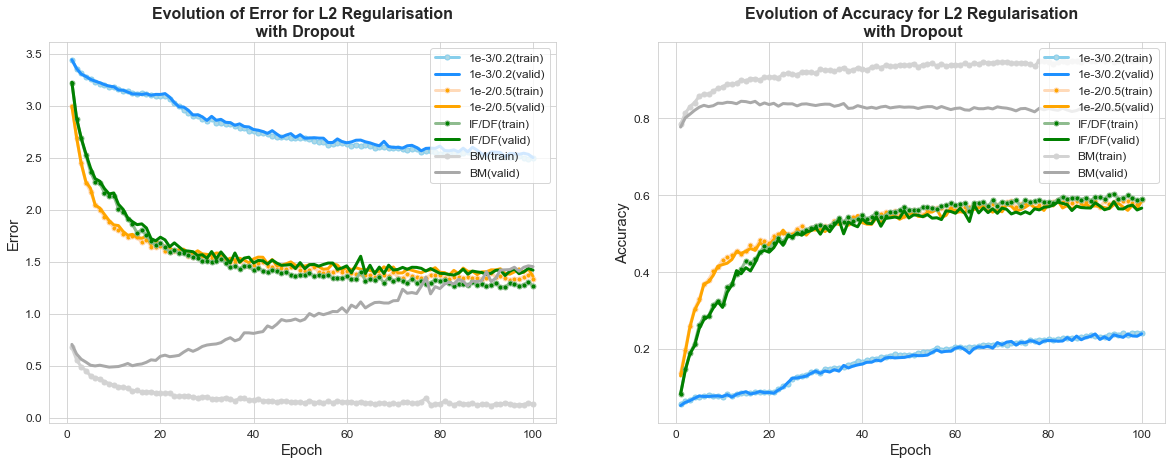

In [716]:
plot_acc_error_evolution(d_L2_df_list)

# Reporting test results of best model

In [786]:
test_results = pd.read_csv('Results/L1_ontest_1e_4_train_valid.csv', index_col=None)
bl_test_results = pd.read_csv('Results/baseline_ontest_train_valid.csv', index_col=None)

test_df_list = [test_results, bl_test_results, L1_1e_4_results]
test_results = prepare_results_table(df_list = test_df_list, model_names = ['L1 1e-4 on test', 'Baseline on test', 'L1 1e-4 on valid',])
test_results

,Neural Network Model,error(train),error(valid),acc(train),acc(valid),runtime
0,L1 1e-4 on test,0.341184,0.465621,0.87644,0.840316,832.185097
1,Baseline on test,0.119484,1.540923,0.95395,0.813987,902.812509
2,L1 1e-4 on valid,0.325711,0.433294,0.87976,0.852089,801.795396


In [761]:
test_results.to_latex('final_results.txt')

In [809]:
def plot_acc_error_evolution(dataset_list):
    fig, axes = plt.subplots(2, 1, figsize = (11,9), sharex=True)

    # Get epoch number for x axis
    epoch_n = range(1, len(dataset_list[0])+1)

    titles = ['Evolution of Error and Accuracy\non Test Set', None]
    acc_error = ['error', 'acc']
    ylabels = ['Error', 'Accuracy']

    for i in range(len(axes)):
        # Plot lines
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[0], marker='.', markerfacecolor='skyblue', markersize=8, color='skyblue', linewidth=5, label = 'Final Model (train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[0], marker='', color='dodgerblue', linewidth=5, label = 'Final Model (test)')
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[1], marker='.', markerfacecolor='lightgrey', markersize=8, color='lightgrey', linewidth=2, label = 'Baseline Model (train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[1], marker='', color='grey', linewidth=2, label = 'Baseline Model (test)')
        axes[i].plot( epoch_n, acc_error[i]+'(train)', data=dataset_list[2], marker='.', markerfacecolor='peachpuff', markersize=8, color='lightgrey', linewidth=2, label = 'Final Model (train)')
        axes[i].plot( epoch_n, acc_error[i]+'(valid)', data=dataset_list[2], marker='', color='orange', linewidth=2, label = 'Final Model (valid)')
        axes[i].tick_params(axis='both', which='major', labelsize=16)
        axes[i].set_ylabel(ylabels[i], fontsize=24)
        axes[i].set_title(titles[i], fontweight="bold", fontsize=26)
    axes[0].legend(loc='best', prop={'size': 20})
    axes[1].set_xlabel('Epoch', fontsize=24)
    plt.tight_layout()
    plt.show()

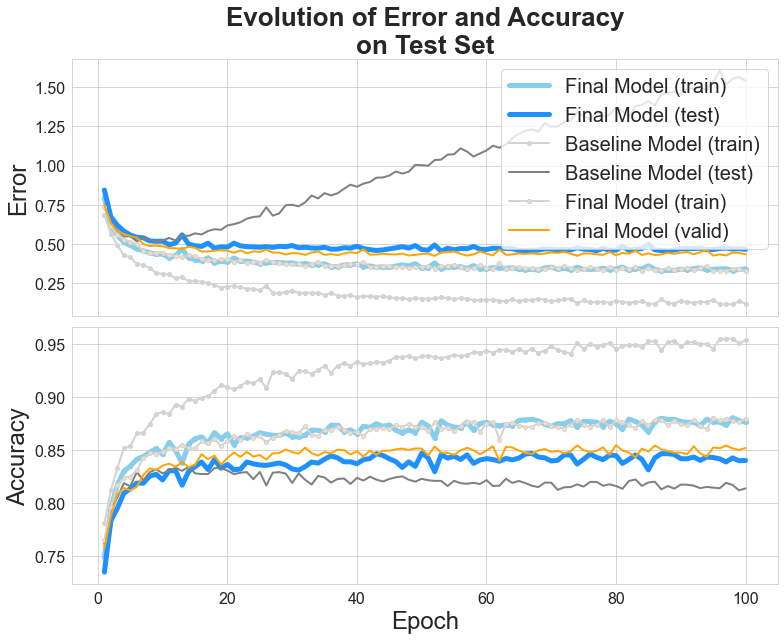

In [810]:
plot_acc_error_evolution(test_df_list)